In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
# Provide the file path of your dataset
facebook_data =r'C:\Users\osoetan\Documents\KNOWLEDGE REPOSITORY\Academics\META.xlsx'

In [4]:
# Load the dataset into a DataFrame
facebook = pd.read_excel(facebook_data)

In [5]:
facebook.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-11,167.070007,167.490005,161.910004,162.880005,162.880005,21885600
1,2022-07-12,164.800003,165.910004,162.100006,163.270004,163.270004,16639700
2,2022-07-13,160.160004,164.979996,159.610001,163.490005,163.490005,16555100
3,2022-07-14,161.220001,162.589996,157.279999,158.050003,158.050003,23765200
4,2022-07-15,160.539993,164.979996,159.820007,164.699997,164.699997,23342800


In [6]:
print(facebook.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB
None


In [ ]:
facebook=facebook.drop(columns=['Date']) #drop date column

In [42]:
facebook=facebook.drop(columns=['Adj Close']) #drop adj close column

In [43]:
print(facebook.info())  # Get information about the dataset after dropping "Date" and "Adj Close" columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Close   250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 9.9 KB
None


In [44]:
print(facebook.describe())  # summary statistics of the facebook dataset

             Open        High         Low       Close        Volume
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean   175.219721  178.488920  173.011160  175.802760  3.205082e+07
std     52.582424   53.169205   52.286682   52.827822  2.204850e+07
min     90.080002   90.459999   88.089996   88.910004  8.629300e+06
25%    132.899997  136.827503  131.489994  133.284996  2.078005e+07
50%    167.419998  170.794998  165.224998  168.654999  2.600345e+07
75%    210.667507  213.812500  208.822502  212.577495  3.465460e+07
max    295.890015  298.119995  291.309998  294.369995  2.323166e+08


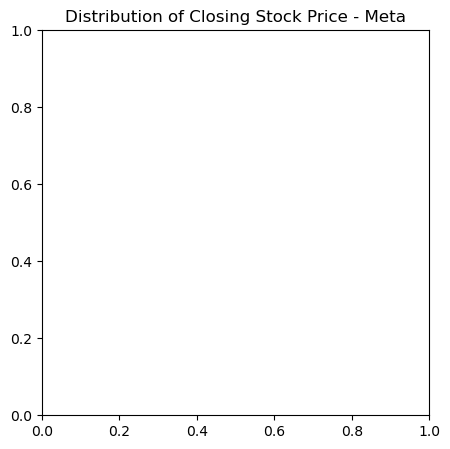

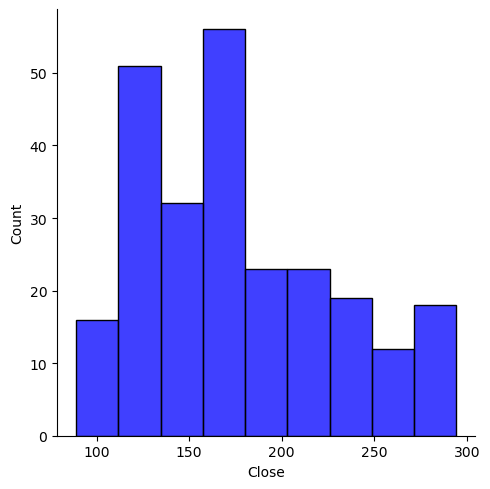

In [45]:
#plot distribution of closing stock
plt.figure(figsize=(5,5))
plt.title('Distribution of Closing Stock Price - Meta')
sns.displot(facebook['Close'], color='blue')
#save plot as PDF file
plt.savefig('Closing_Price_PNG')

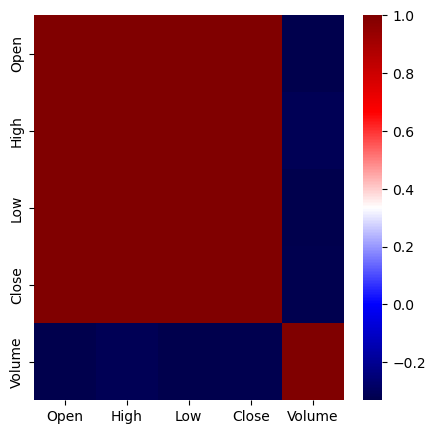

In [46]:
#plotting heatmap to find any correlations between variables
plt.figure(figsize=(5,5))
sns.heatmap(data=facebook.corr(), cmap="seismic", annot=False)
#save heatmap as PDF
plt.savefig('HeatMap_Variables')

In [47]:
features = facebook[['Open', 'High', 'Low', 'Volume']]

In [48]:
targetvariable = facebook['Close']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targetvariable, test_size=0.2, random_state=42)

In [50]:
# Create an instance of the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict on the test data
y_pred = model.predict(X_test)

In [52]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.4593315039492887


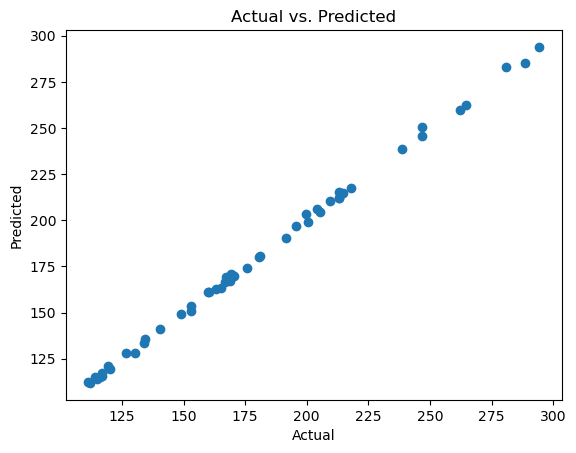

In [22]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

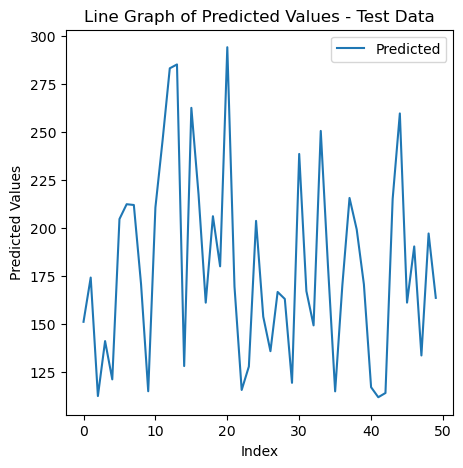

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt

# Assuming you have a list or array of predicted values called 'y_pred'
# If 'y_pred' is a Pandas Series, you can use 'y_pred.values' to extract the underlying NumPy array

# Create a list of x-axis values corresponding to the indices of y_pred
x = range(len(y_pred))

# Plot the predicted values as a line graph
plt.figure(figsize=(5,5))
plt.plot(x, y_pred, label='Predicted')

# Add labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.title('Line Graph of Predicted Values - Test Data')

# Display the legend
plt.legend()

# Show the plot
plt.show()

#save plot as PDF file
plt.savefig('Line_Graph_Pred_TestData')

In [43]:
# Convert 'y_pred' into a DataFrame
predictions = pd.DataFrame({'Predictions': y_pred})

In [44]:
print(predictions)

    Predictions
0    151.130240
1    174.142100
2    112.510196
3    141.093386
4    121.186366
5    204.575682
6    212.291895
7    211.886679
8    170.846855
9    115.006389
10   210.628024
11   245.580541
12   282.984207
13   284.986762
14   128.108908
15   262.421701
16   217.420137
17   161.091151
18   206.043990
19   179.980898
20   293.949776
21   169.449947
22   115.670057
23   127.870566
24   203.623105
25   153.804133
26   135.849670
27   166.658978
28   163.010690
29   119.382192
30   238.437300
31   167.109814
32   149.264810
33   250.411953
34   180.438183
35   114.946558
36   169.969838
37   215.544418
38   199.175065
39   170.614192
40   117.109259
41   111.900778
42   114.104004
43   215.016072
44   259.512865
45   161.108267
46   190.336430
47   133.616293
48   197.069969
49   163.579235


In [47]:
# Predict on the train data
z_pred = model.predict(X_train)

In [48]:
# Calculate the mean squared error
msetrain = mean_squared_error(y_train, z_pred)
print("Mean Squared Error:", msetrain)

Mean Squared Error: 2.5068399110260264


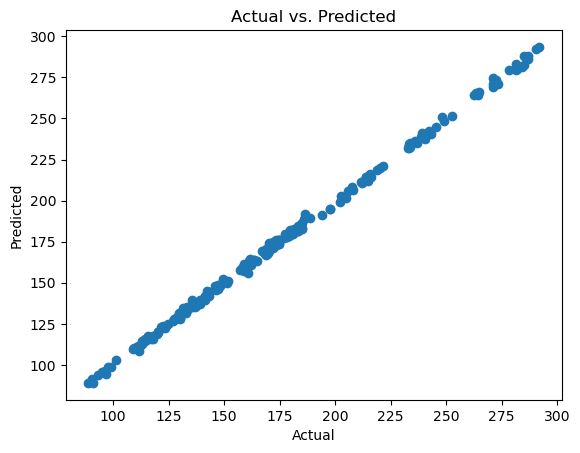

In [49]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_train, z_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
# Assuming you have a list or array of predicted values called 'z_pred'
# If 'z_pred' is a Pandas Series, you can use 'y_pred.values' to extract the underlying NumPy array

# Create a list of x-axis values corresponding to the indices of y_pred
x = range(len(z_pred))

# Plot the predicted values as a line graph
plt.plot(x, z_pred, label='Predicted')

# Add labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.title('Line Graph of Predicted Values - Train Data')

# Display the legend
plt.legend()

# Show the plot
plt.show()

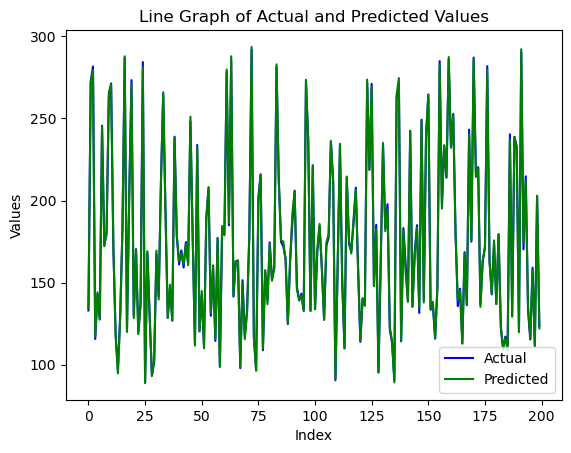

In [55]:
import matplotlib.pyplot as plt
# Create a list of x-axis values corresponding to the indices of the actual and predicted values
x = range(len(y_train))

# Plot the actual values as a red line graph
plt.plot(x, y_train, color='blue', label='Actual')

# Plot the predicted values as a blue line graph
plt.plot(x, z_pred, color='green', label='Predicted')

# Add labels and title to the plot
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Graph of Actual and Predicted Values')

# Display the legend
plt.legend()

# Show the plot
plt.show()
